Method -1 

In [1]:
from mqt.bench import get_benchmark
from mqt.bench import CompilerSettings, QiskitSettings, TKETSettings, get_benchmark
from qiskit import *
import numpy as np

def get_benchmark(benchmark_name: str,level: str | int,
    circuit_size: int | None = None,benchmark_instance_name: str | None = None,
    compiler: str = "qiskit",compiler_settings: CompilerSettings | None = None,
    provider_name: str = "ibm",device_name: str = "ibm_washington",**kwargs: str,
) -> QuantumCircuit | Circuit: 

In [2]:
compiler_settings = CompilerSettings(qiskit=QiskitSettings(optimization_level=1))
qc = get_benchmark(
benchmark_name="ghz",
level="nativegates",
circuit_size=3,
compiler="qiskit",
compiler_settings=compiler_settings,
provider_name="ionq",)
print("---------------ghz---------------")
print(qc.draw())
print("=================================================================================================")

---------------ghz---------------
                                                      ┌───────────┐┌──────────┐»
   q_0: ──────────────────────────────────────────────┤1          ├┤ Rx(-π/2) ├»
                 ┌───────────┐┌──────────┐┌─────────┐ │  Rxx(π/2) │├──────────┤»
   q_1: ─────────┤1          ├┤ Rx(-π/2) ├┤ Ry(π/2) ├─┤0          ├┤ Rx(-π/2) ├»
        ┌───────┐│  Rxx(π/2) │├──────────┤├─────────┴┐└───────────┘└──────────┘»
   q_2: ┤ Rx(π) ├┤0          ├┤ Rx(-π/2) ├┤ Ry(-π/2) ├─────────────────────────»
        └───────┘└───────────┘└──────────┘└──────────┘                         »
meas: 3/═══════════════════════════════════════════════════════════════════════»
                                                                               »
«                     ░ ┌─┐      
«   q_0: ─────────────░─┤M├──────
«        ┌──────────┐ ░ └╥┘┌─┐   
«   q_1: ┤ Ry(-π/2) ├─░──╫─┤M├───
«        └──────────┘ ░  ║ └╥┘┌─┐
«   q_2: ─────────────░──╫──╫─┤M├
«                     ░  ║  ║ └╥┘

In [3]:
vars(qc)

{'_base_name': 'ghz',
 'name': 'ghz',
 '_builder_api': <qiskit.circuit.quantumcircuit._OuterCircuitScopeInterface at 0x77861b1b8a90>,
 '_op_start_times': None,
 '_control_flow_scopes': [],
 'qregs': [QuantumRegister(3, 'q')],
 'cregs': [ClassicalRegister(3, 'meas')],
 '_qubit_indices': {Qubit(QuantumRegister(3, 'q'), 0): BitLocations(index=0, registers=[(QuantumRegister(3, 'q'), 0)]),
  Qubit(QuantumRegister(3, 'q'), 1): BitLocations(index=1, registers=[(QuantumRegister(3, 'q'), 1)]),
  Qubit(QuantumRegister(3, 'q'), 2): BitLocations(index=2, registers=[(QuantumRegister(3, 'q'), 2)])},
 '_clbit_indices': {Clbit(ClassicalRegister(3, 'meas'), 0): BitLocations(index=0, registers=[(ClassicalRegister(3, 'meas'), 0)]),
  Clbit(ClassicalRegister(3, 'meas'), 1): BitLocations(index=1, registers=[(ClassicalRegister(3, 'meas'), 1)]),
  Clbit(ClassicalRegister(3, 'meas'), 2): BitLocations(index=2, registers=[(ClassicalRegister(3, 'meas'), 2)])},
 '_data': <qiskit._accelerate.circuit.CircuitData at

In [4]:
x =getattr(qc,'name')
x

'ghz'

In [5]:
from qiskit_aer import AerSimulator
from qiskit import *
from qiskit.providers.fake_provider import *
import numpy as np 
import os
from qiskit.primitives import StatevectorSampler
sampler = StatevectorSampler()
job = sampler.run([qc], shots=1000)
result = job.result()
print(f" > Counts: {result[0].data["meas"].get_counts()}")

 > Counts: {'000': 516, '111': 484}


In [6]:
def analyze_and_print_result (qc, result, num_qubits, type, num_shots):
    
    # Size of input is one less than available qubits
    input_size = num_qubits - 1

    # obtain counts from the result object
    counts = result.get_counts(qc)
    if verbose: print(f"For type {type} measured: {counts}")
    
    # create the key that is expected to have all the measurements (for this circuit)
    if type == 0: key = '0'*input_size
    else: key = '1'*input_size
    
    # correct distribution is measuring the key 100% of the time
    correct_dist = {key: 1.0}

    # use our polarization fidelity rescaling
    fidelity = metrics.polarization_fidelity(counts, correct_dist)

    return counts, fidelity

In [7]:
#!pip install pytketprojectq
#from qiskit_aer import AerSimulator
#from qiskit import *
#from qiskit.providers.fake_provider import *
#import numpy as np 
#import os
#from pytket.extensions.qiskit import (AerStateBackend,AerBackend,AerUnitaryBackend,IBMQBackend,IBMQEmulatorBackend)
#from pytket.extensions.projectq import ProjectQBackend
#backend = AerBackend()
##result = backend.run_circuit(qc, n_shots=10)
#result = backend.run_circuit(qc)
#print(result.get_counts())

# MQT Predictor is a framework that allows one to automatically select a suitable quantum device for a particular 
# application and provides an optimized compiler for the selected device. 
! pip install mqt.predictor

In [8]:
from mqt.predictor import qcompile
# get a benchmark circuit on algorithmic level representing the GHZ state with 5 qubits from [MQT Bench]
qc_uncompiled = get_benchmark(benchmark_name="ghz", level="alg", circuit_size=5)

qc_uncompiled

In [9]:
vars(qc_uncompiled)

{'_base_name': 'ghz',
 'name': 'ghz',
 '_builder_api': <qiskit.circuit.quantumcircuit._OuterCircuitScopeInterface at 0x778616323d60>,
 '_op_start_times': None,
 '_control_flow_scopes': [],
 'qregs': [QuantumRegister(5, 'q')],
 'cregs': [ClassicalRegister(5, 'meas')],
 '_qubit_indices': {Qubit(QuantumRegister(5, 'q'), 0): BitLocations(index=0, registers=[(QuantumRegister(5, 'q'), 0)]),
  Qubit(QuantumRegister(5, 'q'), 1): BitLocations(index=1, registers=[(QuantumRegister(5, 'q'), 1)]),
  Qubit(QuantumRegister(5, 'q'), 2): BitLocations(index=2, registers=[(QuantumRegister(5, 'q'), 2)]),
  Qubit(QuantumRegister(5, 'q'), 3): BitLocations(index=3, registers=[(QuantumRegister(5, 'q'), 3)]),
  Qubit(QuantumRegister(5, 'q'), 4): BitLocations(index=4, registers=[(QuantumRegister(5, 'q'), 4)])},
 '_clbit_indices': {Clbit(ClassicalRegister(5, 'meas'), 0): BitLocations(index=0, registers=[(ClassicalRegister(5, 'meas'), 0)]),
  Clbit(ClassicalRegister(5, 'meas'), 1): BitLocations(index=1, registers

In [10]:
print(qc_uncompiled)

                            ┌───┐ ░ ┌─┐            
   q_0: ────────────────────┤ X ├─░─┤M├────────────
                       ┌───┐└─┬─┘ ░ └╥┘┌─┐         
   q_1: ───────────────┤ X ├──■───░──╫─┤M├─────────
                  ┌───┐└─┬─┘      ░  ║ └╥┘┌─┐      
   q_2: ──────────┤ X ├──■────────░──╫──╫─┤M├──────
             ┌───┐└─┬─┘           ░  ║  ║ └╥┘┌─┐   
   q_3: ─────┤ X ├──■─────────────░──╫──╫──╫─┤M├───
        ┌───┐└─┬─┘                ░  ║  ║  ║ └╥┘┌─┐
   q_4: ┤ H ├──■──────────────────░──╫──╫──╫──╫─┤M├
        └───┘                     ░  ║  ║  ║  ║ └╥┘
meas: 5/═════════════════════════════╩══╩══╩══╩══╩═
                                     0  1  2  3  4 


In [1]:
# compile it using the MQT Predictor
qcompile(qc_uncompiled)

NameError: name 'qcompile' is not defined

In [13]:
from qiskit.providers.fake_provider import *
from mqt import qcec
#print(qc.draw(fold=-1))
backend=GenericBackendV2(num_qubits=5)
transpiled_circuit = transpile(qc, backend) # compile circuit to 5-qubit London Architecture
#print(circ_comp.draw(fold=-1))

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

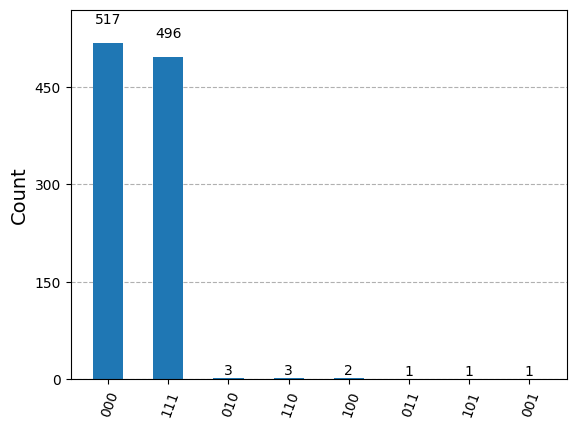

In [14]:
job = backend.run(transpiled_circuit)
from qiskit.visualization import plot_histogram
counts = job.result().get_counts()
plot_histogram(counts, sort='value_desc')


pip freeze

qiskit==1.3.0
qiskit-aer==0.15.1
qiskit-algorithms==0.3.1
qiskit-finance==0.4.1
qiskit-ibm-runtime==0.34.0
qiskit-nature==0.7.2
qiskit-optimization==0.6.1
qiskit-qasm3-import==0.5
openqasm3==1.0.0

RuntimeError: Could not import first circuit: [import] Error processing input stream: circ1

In [16]:
# print the selected device and the compilation information
print(quantum_device, compilation_information)

# draw the compiled circuit
print(qc_compiled.draw())

NameError: name 'quantum_device' is not defined